In [1]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to the SQLite database
db_path = "../data/business_finance.db"
conn = sqlite3.connect(db_path)

=== Department Monthly Profit Trend ===
     month department_name  total_profit
0  2023-01         Finance      26238.55
1  2023-01              HR     122953.29
2  2023-01              IT     281263.94
3  2023-01       Marketing     212976.63
4  2023-01           Sales     133211.07


<Figure size 1200x600 with 0 Axes>

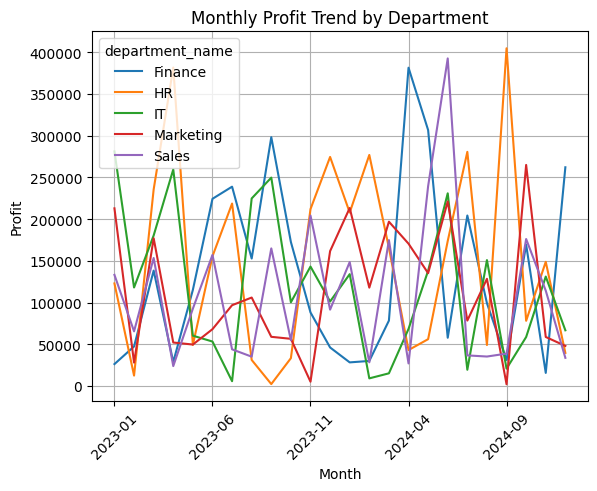

In [3]:
# --- Query 1: Department monthly profit trend (last 2 years) ---
query1 = """
SELECT
    month,
    d.department_name,
    SUM(financials.profit) AS total_profit
FROM financials
JOIN departments d ON financials.department_id = d.department_id
GROUP BY month, d.department_name
ORDER BY month, d.department_name;
"""
profit_trend = pd.read_sql(query1, conn)

print("=== Department Monthly Profit Trend ===")
print(profit_trend.head())

# Pivot for plotting
pivot_profit = profit_trend.pivot(index='month', columns='department_name', values='total_profit')

plt.figure(figsize=(12,6))
pivot_profit.plot(title="Monthly Profit Trend by Department")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

=== Average Salary + Bonus by Department ===
  department_name  avg_base_salary    avg_bonus  num_employees
0           Sales     82410.427273  4540.940909             11
1       Marketing     70965.916667  6019.530000              6
2              HR     70484.825556  5011.623333              9
3              IT     69431.649000  6149.739000             10
4         Finance     60848.584286  5783.026429             14


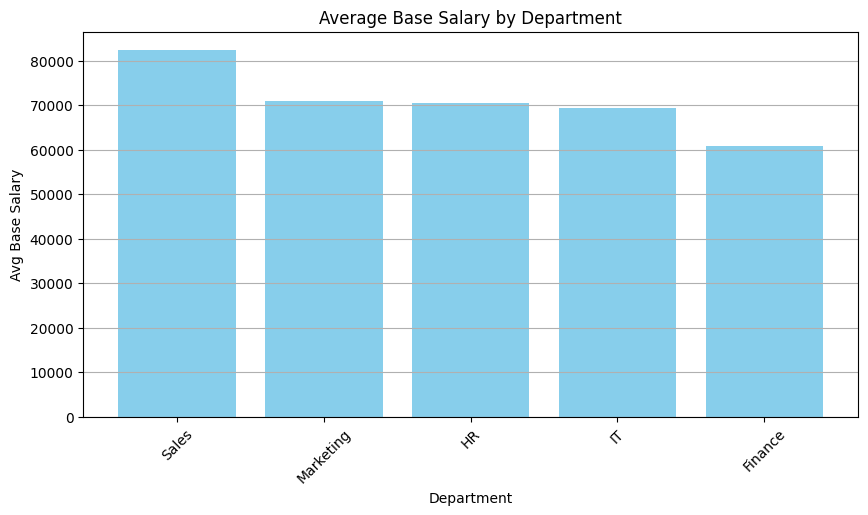

In [4]:
# --- Query 2: Average employee salary + bonus by department ---
query2 = """
SELECT
    d.department_name,
    AVG(s.base_salary) AS avg_base_salary,
    AVG(s.bonus) AS avg_bonus,
    COUNT(e.employee_id) AS num_employees
FROM salaries s
JOIN employees e ON s.employee_id = e.employee_id
JOIN departments d ON e.department_id = d.department_id
GROUP BY d.department_name
ORDER BY avg_base_salary DESC;
"""
avg_salaries = pd.read_sql(query2, conn)

print("=== Average Salary + Bonus by Department ===")
print(avg_salaries)

# Plot average base salary by department
plt.figure(figsize=(10,5))
plt.bar(avg_salaries['department_name'], avg_salaries['avg_base_salary'], color='skyblue')
plt.title("Average Base Salary by Department")
plt.xlabel("Department")
plt.ylabel("Avg Base Salary")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

=== Project Allocation Intensity ===
  department_name                          project_name  \
0         Finance           Enable Proactive E-Business   
1         Finance          Monetize Strategic Platforms   
2         Finance          Mesh Front-End Methodologies   
3         Finance           Syndicate Turn-Key Eyeballs   
4              HR  Incentivize Collaborative E-Services   
5              HR      Facilitate End-To-End E-Services   
6              HR            Mesh Wireless Applications   
7              HR         Generate Synergistic Channels   
8              IT       Integrate Plug-And-Play Content   
9              IT  Syndicate Mission-Critical Bandwidth   

   avg_allocation_percentage  num_employees_allocated  
0                  70.000000                        5  
1                  66.666667                        3  
2                  62.500000                        4  
3                  50.000000                        2  
4                  79.166667     

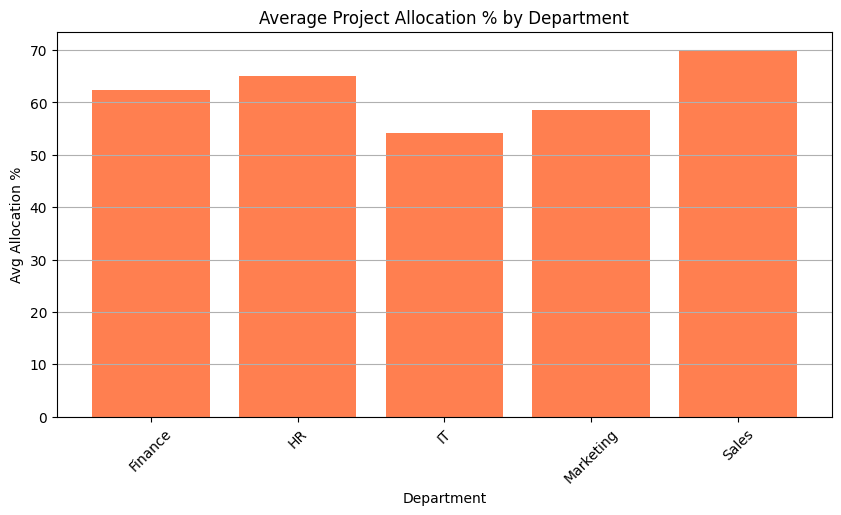

In [5]:
# --- Query 3: Project allocation intensity ---
query3 = """
SELECT
    d.department_name,
    p.project_name,
    AVG(pa.allocation_percentage) AS avg_allocation_percentage,
    COUNT(pa.employee_id) AS num_employees_allocated
FROM project_allocations pa
JOIN projects p ON pa.project_id = p.project_id
JOIN departments d ON p.department_id = d.department_id
GROUP BY d.department_name, p.project_name
ORDER BY d.department_name, avg_allocation_percentage DESC;
"""
project_alloc = pd.read_sql(query3, conn)

print("=== Project Allocation Intensity ===")
print(project_alloc.head(10))


# For visualization: average allocation percentage by department (averaged across projects)
avg_alloc_by_dept = project_alloc.groupby('department_name')['avg_allocation_percentage'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(avg_alloc_by_dept['department_name'], avg_alloc_by_dept['avg_allocation_percentage'], color='coral')
plt.title("Average Project Allocation % by Department")
plt.xlabel("Department")
plt.ylabel("Avg Allocation %")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

=== Employee Hires per Year by Department ===
   department_name hire_year  num_hired
0          Finance      2020          1
1          Finance      2021          4
2          Finance      2022          2
3          Finance      2023          2
4          Finance      2024          5
5               HR      2020          3
6               HR      2021          1
7               HR      2022          3
8               HR      2024          2
9               IT      2020          3
10              IT      2022          2
11              IT      2023          3
12              IT      2024          1
13              IT      2025          1
14       Marketing      2021          4


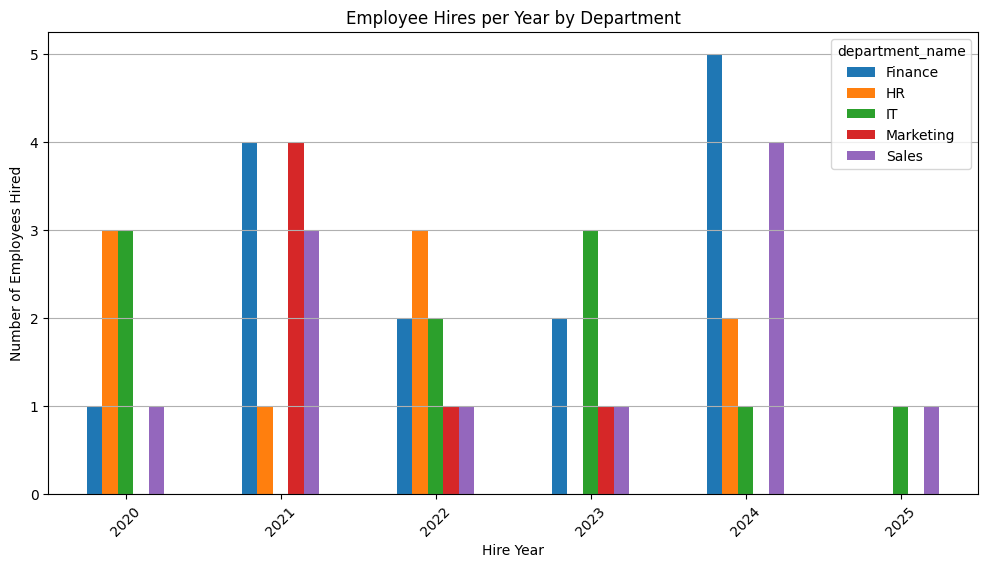

In [6]:
# --- Query 4: Employee hires per year by department ---
query4 = """
SELECT
    d.department_name,
    STRFTIME('%Y', e.hire_date) AS hire_year,
    COUNT(e.employee_id) AS num_hired
FROM employees e
JOIN departments d ON e.department_id = d.department_id
GROUP BY d.department_name, hire_year
ORDER BY d.department_name, hire_year;
"""
hires = pd.read_sql(query4, conn)

print("=== Employee Hires per Year by Department ===")
print(hires.head(15))

# Pivot for plotting hires over years
pivot_hires = hires.pivot(index='hire_year', columns='department_name', values='num_hired').fillna(0)

pivot_hires.plot(kind='bar', figsize=(12,6), title="Employee Hires per Year by Department")
plt.xlabel("Hire Year")
plt.ylabel("Number of Employees Hired")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [7]:
# Close the database connection
conn.close()